## 3.3 Test Trained Yolo OBB

- Move downlaoded `yolov8-obb-custom.pt` into folder `Pertemuan_3/`,<br><br>
<img src="resource/paste-model.png" width="500px" style="background:white;padding:5px">

In [9]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("OpenCV version: " + cv2.__version__)

OpenCV version: 4.11.0


#### EXAMPLE 1 - Using Ultralytics Yolo OBB Model to detect Object Orientation

In [10]:
# Load a model
model = YOLO("yolov8-obb-custom.pt")  # load an official model

In [22]:
# load image
image_path = "scissors.png"
image = cv2.imread(image_path)

# Predict with the model
results = model(image_path)  # predict on an image


image 1/1 c:\Users\MuhammadYunus\Downloads\Github\OpenCV-ObjectAnalysis-Learn\Pertemuan_3\scissors.png: 320x320 96.5ms
Speed: 2.1ms preprocess, 96.5ms inference, 2.6ms postprocess per image at shape (1, 3, 320, 320)


In [12]:
results[0].show()  # display the image

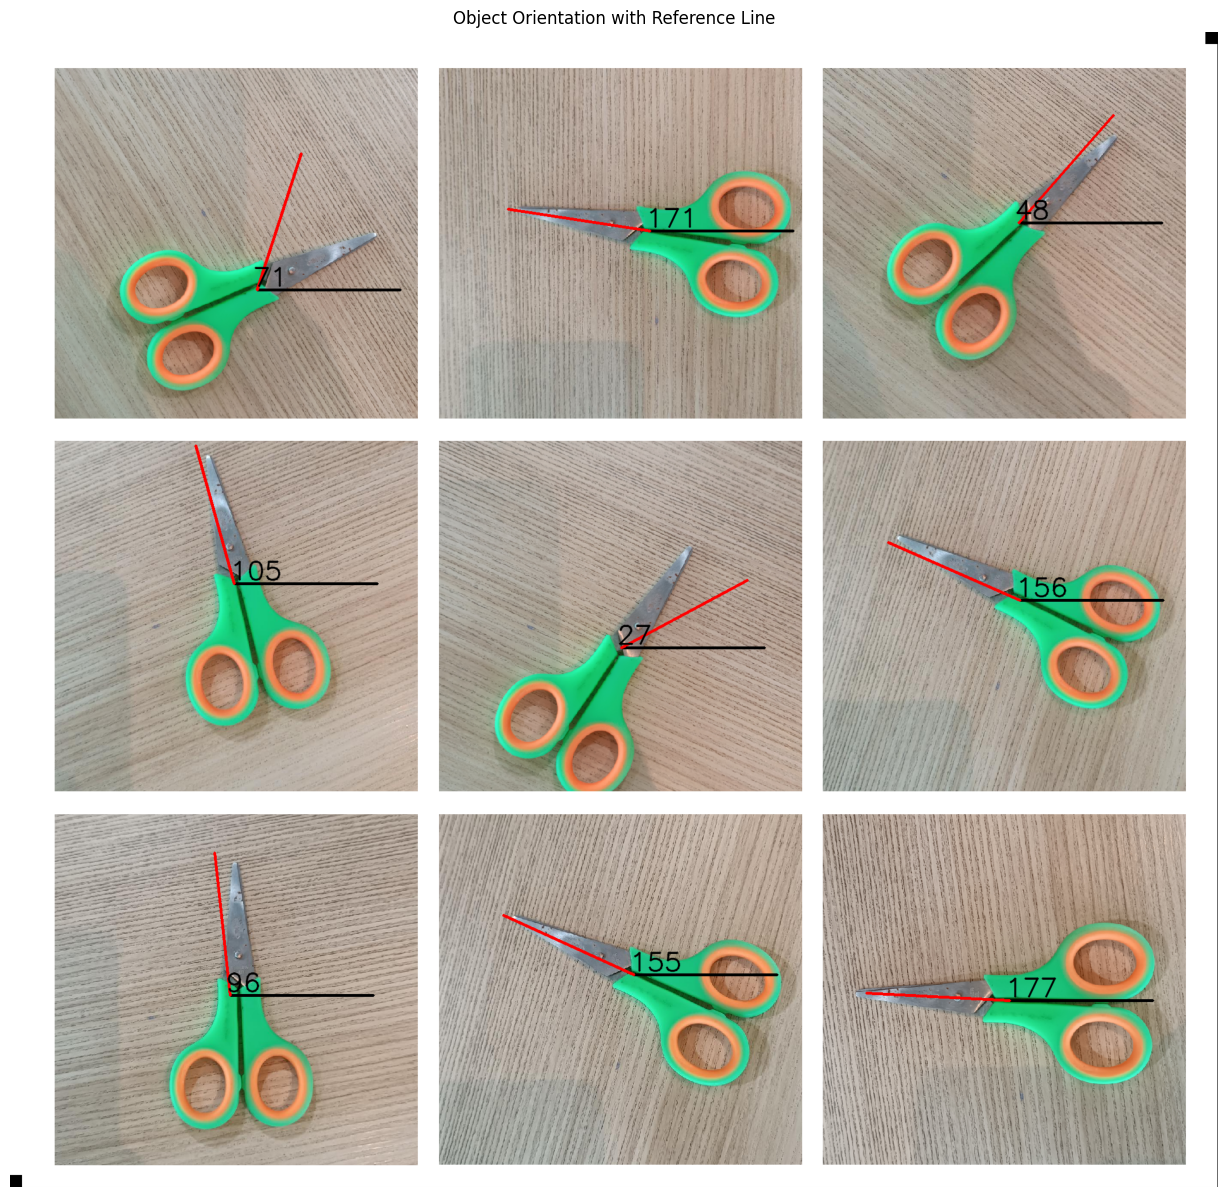

In [23]:
# Draw bounding boxes and orientations
output = image.copy()
for result in results[0]:

    xywhr = result.obb.xywhr.cpu().numpy().squeeze()  # Extract [center-x, center-y, width, height, angle] from the result
    
    center = tuple(xywhr[:2].astype(int))  # Extract center (x, y)

    # Extract rotation angle in radians, 
    # considering the object is taller than it is wide, 
    # otherwise, we need to add np.pi to the angle
    if(xywhr[2] < xywhr[3] ):
        angle_rad = xywhr[4] 
    else:
        angle_rad = np.pi - xywhr[4] # flip the angle
    

    # Define the length of the orientation lines
    length = 250 

    # Draw original horizontal reference line (black)
    cv2.line(output, center, (center[0] + length, center[1]), (0, 0, 0), 3)
    
    # Compute and draw rotation axis (red line)
    end_x = int(center[0] + length * np.cos(angle_rad))
    end_y = int(center[1] - length * np.sin(angle_rad))
    cv2.line(output, center, (end_x, end_y), (0, 0, 255), 3)
    
    # Draw angle text
    angle = np.rad2deg(angle_rad)
    text_position = (center[0] - 7, center[1] - 7)
    cv2.putText(output, f"{int(angle)}", text_position, cv2.FONT_HERSHEY_SIMPLEX, 
                1.5, (0, 0, 0), 2, cv2.LINE_AA)

# Show results using Matplotlib
plt.figure(figsize=(20, 15))
plt.imshow(output[:, :, ::-1])  # Convert BGR to RGB
plt.axis("off")
plt.title("Object Orientation with Reference Line")
plt.show()


- **Pros ✅**
    - ✔ **Robust to Noise & Partial Occlusion** – Learns object features beyond shape.  
    - ✔ **Works with Any Object Type** – Can detect orientation even for irregular shapes.  
    - ✔ **Combines Object Detection & Orientation** – Provides classification along with orientation.  
    - ✔ **Performs Well in Real-World Scenarios** – Ideal for aerial images, robotics, and autonomous systems.  

- **Cons ❌**
    - ✖ **Requires Training Data & Annotations** – Needs a labeled dataset with object orientations.  
    - ✖ **Computationally Expensive** – Requires a GPU for real-time inference.  

# Source : 

- https://docs.ultralytics.com/tasks/obb/